# Predicting Loan Defaults for LendingClub - Research Question 5

**Research Question 5:** Which machine learning model best predicts if a particular loan will default or not?

**Aim**: The aim of this notebook is to identify the machine learning model that can best predict if a loan will default or not with a high level of accuracy and interpretability.

## Table of contents.

1. k-Nearest Neighbors
 - Building the base classifier
 - Fine tuning parameters
 - Scaling the data 
 - Performance Evaluation
2. Logistic Regression
 - Building the base classifier
 - Fine tuning parameters
 - Scaling the data
 - Performance evaluation
3. Linear Support Vector Machines
 - Building the base classifier
 - Fine tuning parameters
 - Scaling the data
 - Performance Evaluation
4. Decision Tree 
 - Building the base classifier
 - Fine tuning parameters
 - Performance Evaluation
5. Random Forests
 - Building the base classifier
 - Fine tuning parameters
 - Performance Evaluation
6. Gradient Boosted Trees (AdaBoost)
 - Building the base classifier 
 - Fine tuning parameters
 - Performance Evaluation
7. Gaussian Naive Bayes
 - Building the base classifier
 - Scaling the data 
 - Performance Evaluation
8. Ensemble Model
 - Building the base classifier
 - Scaling the data
 - Performance Evaluation
9. Evaluation & Results
10. Conclusion

## Package Requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import warnings

**Loading in the data**

In [2]:
#Loading in the data

df = pd.read_csv('default_prediction.csv')

In [3]:
#Dropping in the index

df = df.drop('Unnamed: 0', axis = 1)

In [4]:
df.head()

,loan_amnt,int_rate,sub_grade,issue_d,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,tot_cur_bal,default
0,5000.0,10.65,6.0,7.0,861.07,0.00,3.0,171.62,2.0,138236.152549,0.0
1,2500.0,15.27,13.0,7.0,435.17,117.08,5.0,119.66,5.0,138236.152549,1.0
2,2400.0,15.96,14.0,7.0,603.65,0.00,4.0,649.91,2.0,138236.152549,0.0
3,10000.0,13.49,10.0,7.0,2209.33,0.00,3.0,357.48,3.0,138236.152549,0.0
4,5000.0,7.90,3.0,7.0,631.38,0.00,3.0,161.03,3.0,138236.152549,0.0


In [5]:
#Creating the features 

features = df.drop('default', axis = 1).values
target = df['default'].values

**Splitting the data into training and test sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, 
                                                    stratify = target)

## k-Nearest Neighbors

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the k-Nearest Neighbors algorithm 

### Building the base classifier

In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [8]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
knn_classifier.score(X_test, y_test)

0.90984568062144833

From the output above: 

- The base k-NN classifier has produced an accuracy score of 90.9%

### Fine Tuning Parameters using GridSearchCV

In [10]:
#Initializing a grid with possible number of neighbors from 1 to 24

grid = {'n_neighbors' : np.arange(1, 24)}

#Initializing a k-NN classifier 

knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 

knn = GridSearchCV(knn_classifier, grid, cv = 5)

knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [11]:
#Extracting the optimal number of neighbors 

knn.best_params_

{'n_neighbors': 5}

In [12]:
#Extracting the accuracy score for optimal number of neighbors

knn.best_score_

0.91140704163198727

From the output produced above:

- The best number of neighbors after using the GridSearchCV algorithm that gives the most optimal performance is 5.
- The accuracy of the model **increased from 90.9% to 91.1%.**

**Visualizing the accuracy scores between the training and test sets for different number of n neighbors**

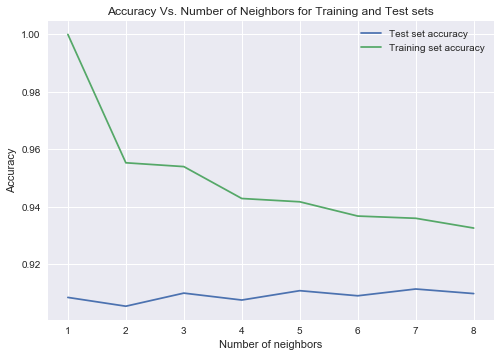

In [13]:
range_of_neighbors = np.arange(1,9)

#Accuracy scores of training data are stored in this empty set 

training_set_acc = np.empty(len(range_of_neighbors))

#Accuracy scores of test data are stored in this empty set

test_set_acc = np.empty(len(range_of_neighbors))

#Looping over each value of n_neighbors

for element, num in enumerate(range_of_neighbors):
    
    #Initialize a k-NN classifier
    
    knn_classifier = KNeighborsClassifier(n_neighbors = num)
    
    #Fitting the model to training data
    
    knn_classifier.fit(X_train, y_train)
    
    #Computing accuracy on training data
    
    training_set_acc[element] = knn_classifier.score(X_train, y_train)
    
    #Computing accuracy on test data
    
    test_set_acc[element] = knn_classifier.score(X_test, y_test)
    
#Creating the plot

plt.plot(range_of_neighbors, test_set_acc, label = "Test set accuracy")
plt.plot(range_of_neighbors, training_set_acc, label = 'Training set accuracy')
plt.title('Accuracy Vs. Number of Neighbors for Training and Test sets')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    

From the output produved above:
    
- The model is very overfit when the number of nearest neighbors = 1, as it produces an accuracy score of 100% on the training data.
- When the number of neighbors = 5, the model has the best accuracy score on the test set and a reasonably high score on the training set.
- Thus combining this visualization with the results of GridSearchCV, the **optimal number of nearest neighbors is: 5.**

### Scaling the data

In [14]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 5))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

knn_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

knn_classifier_scaled.score(X_test, y_test)

0.95246598196131593

From the output produced above:

- After standardization - Subracting each value of a feature by the mean of a feature and dividing each value by the variance of the entire feature, the **accuracy of the model improved.**
- The **accuracy of the model is now 95.2%** which is an improvement from 91.1% previously. 

### Performance Evaluation

**Confusion Matrix**

In [15]:
#Creating predictions on the test set 

prediction = knn_classifier_scaled.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[60912  1845]
 [ 1802 12165]]


In [16]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97     62757
        1.0       0.87      0.87      0.87     13967

avg / total       0.95      0.95      0.95     76724



From the output produced above:
    
- The classifier has equally high precision and recall scores of 0.95 along with the same F1-Score of 0.95.
- This indicates that not many non-defaulted loans are predicted as defaulted (Due to the high value of precision).
- This also indicates that the model predicted most of the defaulted loans correctly (Due to the high value of recall).
- The model also produces an almost equal number of False Positives and False negatives.
- The model has a high number of True positives and True negatives.
- This indicates that the model is very balanced. 

**Cumulative gains curve**

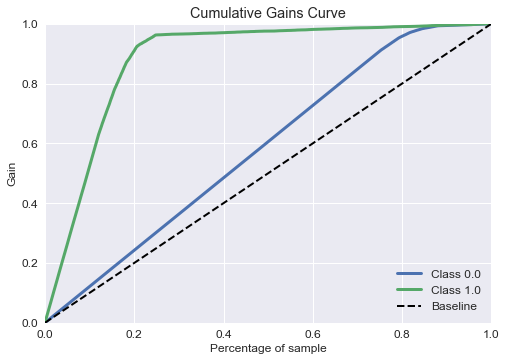

In [17]:
# Plot the cumulative gains graph

predictions = knn_classifier_scaled.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predictions)

plt.show()

From the output produced above:
    
- The cumulative gains curve for our target class of 1.0 (Defaulted loans) captures/predicts 100% of the defaulted loans if we have anything greater than 80% of the total data.
- If we have 25% of the total data, the k-NN classifier would capture/predict 95% of the defaulted loans.

**Lift Curve**

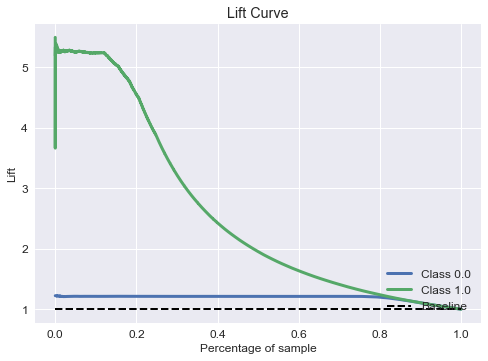

In [18]:
# Plot the lift curve 

predictions = knn_classifier_scaled.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, predictions)

plt.show()

From the output produced above: 
    
- 18% of the population that are likely to default have a value of lift that is greater than 5.
- This means that 18% of the population that are likely to default will give very accurate results when it comes to predicting defaults using the k-Nearest Neighbors model compared to not using a predictive model at all.

## Logistic Regression

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the logistic regression algorithm.

### Building the base classifier

In [19]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression(random_state = 42)

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#Printing out the coefficients of each variable 

print(logistic_regression.coef_)

[[  1.10025045e-04   3.74310715e-04   2.16135487e-02  -2.40456222e-02
   -2.81819097e-04   4.03654849e-02  -8.48586220e-03  -1.58757648e-03
   -1.31876471e-02  -5.88260838e-06]]


In [21]:
#Printing out the intercept of the model

print(logistic_regression.intercept_)

[-0.00225033]


In [22]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.92624211459256556

From the output produced above:

- The base logistic regression model produces an **accuracy score of 92.6%.**
- The model coefficients & intercept makes the model highly interpretable. 
- The formula of the model can thus be constructed as follows:

*Model Output = Summation of ((Coefficients x Variable) + Intercept)*

- Applying the output of this forumla above to the logit function gives the probability of default: 

*1/(1 + e ^ -(Model Output))* 

### Fine tuning parameters

In [23]:
#Building the model with L1 penality 

logistic_regression = linear_model.LogisticRegression(penalty='l1', random_state = 42)

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(logistic_regression, {'C':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The best inverse regularization strength is:", grid.best_params_)

The best inverse regularization strength is: {'C': 0.01}


From the output produced above:
    
- The optimal value for the inverse regularization strength is: 0.01

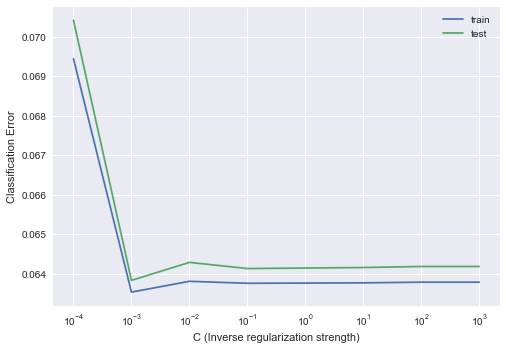

In [24]:
train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for param in C_list:
    
    # Create LogisticRegression object and fit
    logistic_regression = linear_model.LogisticRegression(penalty = 'l1', C= param, random_state = 42)
    logistic_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append( 1.0 - logistic_regression.score(X_train, y_train) )
    test_errors.append( 1.0 - logistic_regression.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Classification Error')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

From the output produced above: 
    
- The inverse regularization strength of 0.01 has low values of classification error for both training and test sets. 
- This suggests that the model is not overfit or underfit.

### Scaling the data 

In [25]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('logistic_reg', linear_model.LogisticRegression(penalty = 'l1', C = 10, random_state = 42))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

logistic_regression_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

logistic_regression_scaled.score(X_test, y_test)

0.9513711485324019

From the output above:

- After standardization of the data, the accuracy of the model has improved from **92.6% to 95.1%.**

### Performance Evaluation

**Confusion Matrix**

In [26]:
#Creating predictions on the test set 

prediction = logistic_regression_scaled.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[61279  1478]
 [ 2253 11714]]


In [27]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97     62757
        1.0       0.89      0.84      0.86     13967

avg / total       0.95      0.95      0.95     76724



From the output produced above: 
    
- The classifier has equally high precision and recall scores of 0.95 along with the same F1-Score of 0.96.
- This indicates that not many non-defaulted loans are predicted as defaulted (Due to the high value of precision).
- This also indicates that the model predicted most of the defaulted loans correctly (Due to the high value of recall).
- The model produces a slightly higher number of false negatives than false positives, indicating that this model will a higher chance of predicting a loan as 'not defaulted' when it actually has 'defaulted'. 
- The model has a high number of True positives and True negatives.

**Cumulative Gains Curve**

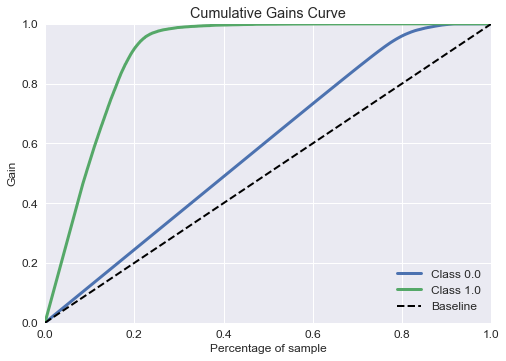

In [28]:
# Plot the cumulative gains graph

predictions = logistic_regression_scaled.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predictions)

plt.show()

From the output produced above:
    
- The cumulative gains curve for our target class of 1.0 (Defaulted loans) captures/predicts 100% of the defaulted loans if we have anything greater than 30% of the total data.
- If we have 20% of the total data, the logistic regression classifier would capture/predict 95% of the defaulted loans.

**Lift Curve**

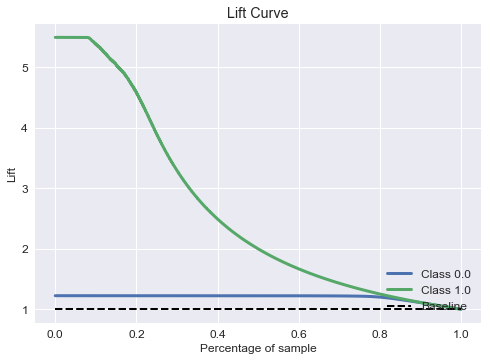

In [29]:
# Plot the lift curve

predictions = logistic_regression_scaled.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, predictions)

plt.show()

From the output produced above: 
    
- 10% of the population that are likely to default have a value of lift that is greater than 5.
- This means that 10% of the population that are likely to default will give very accurate results when it comes to predicting defaults using the logistic regression model compared to using no predictive model.

## Linear Support Vector Machines

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the Support Vector Machines algorithm.

### Building the base classifier

In [30]:
#Initializing a SVM model 

svm_classifier = LinearSVC(random_state = 42)

In [31]:
#Fitting the model to the training data

svm_classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [32]:
#Extracting the accuracy score from the training data

svm_classifier.score(X_test, y_test)

0.91916479849851418

From the output produced above:

- The base Support Vector Machine classifier has an **accuracy of 91.9%**

### Fine tuning parameters

In [33]:
#Building the model 

svm_classifier = LinearSVC(random_state = 42)

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(svm_classifier, {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The best inverse regularization strength is:", grid.best_params_)

The best inverse regularization strength is: {'C': 10}


From the output produced above:

- The most optimal value for the inverse regularization strength is: 10

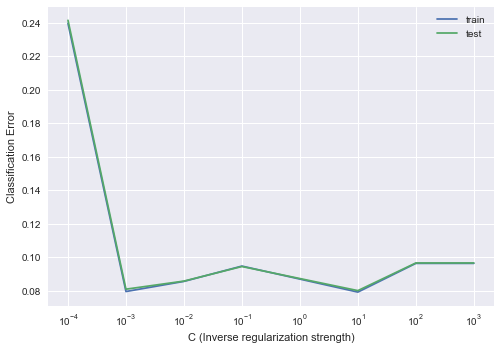

In [34]:
train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for param in C_list:
    
    # Create SVM object and fit
    svm_classifier = LinearSVC(C= param, random_state = 42)
    svm_classifier.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append( 1.0 - svm_classifier.score(X_train, y_train) )
    test_errors.append( 1.0 - svm_classifier.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Classification Error')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

From the output above it is clear that:

- A value of 10 for the inverse regularization strength is optimal because it has low classification errors on the training and test sets suggesting that the model is not overfit or underfit. 

### Scaling the data

In [35]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('SVM', LinearSVC(C = 10, random_state = 42))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

svm_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

svm_classifier_scaled.score(X_test, y_test)

0.95717115895938687

From the output produced above: 
    
- The accuracy of the model has **improved from 91.9% to 95.7%** after scaling the data.

### Performance Evaluation

**Confusion Matrix**

In [36]:
#Creating predictions on the test set 

prediction = svm_classifier_scaled.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[61345  1412]
 [ 1874 12093]]


In [37]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97     62757
        1.0       0.90      0.87      0.88     13967

avg / total       0.96      0.96      0.96     76724



From the output produced above:
    
- The model has a high number of True Positives and True Negatives.
- The classifier has equally high precision and recall scores of 0.96 along with the same F1-Score of 0.95.
- This indicates that not many non-defaulted loans are predicted as defaulted (Due to the high value of precision).
- This also indicates that the model predicted most of the defaulted loans correctly (Due to the high value of recall).
- The model produces a higher number of false negatives than false positives, indicating that this model will a higher chance of predicting a loan as 'not default' when it actually has defaulted. 
- The lack of the a **predict_proba** method for the LinearSVC limits model performance evaluation and interpretability.


## Decision Tree 

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the Decision Tree algorithm.

### Building the base classifier

In [38]:
#Initializing an empty DT classifier with a random state value of 42 for reproducability

dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [39]:
#Fitting the classifier on the training data

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [40]:
#Extracting the scores 

dt_classifier.score(X_test, y_test)

0.97650018247223813

From the output produced above:
    
- The base decision tree classifier has an accuracy of 97.6%

### Fine tuning parameters

In [41]:
#Creating a grid of hyperparameters

grid = {
    'max_depth': [3,4,5,6],
    'min_samples_leaf': [0.04, 0.06, 0.08]
}

#Building a 5 fold CV GridSearchCV object

grid_object = GridSearchCV(estimator = dt_classifier, param_grid = grid, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [42]:
#Fitting the grid to the training data

grid_object.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
#Extracting the best parameters

grid_object.best_params_

{'max_depth': 4, 'min_samples_leaf': 0.04}

In [44]:
#Extracting the best score

grid_object.best_score_

0.94481094396746745

In [45]:
#Extracting the best model

dt_classifier = grid_object.best_estimator_

From the output above:
    
- The accuracy of the model decreased from 97% to 94.4%
- However, GridSearchCV uses cross-validation to minimize the generalization error that is caused due to bias and variance.
- This suggests that the base model was highly overfit.
- Hence the optimal model extracted from GridSearchCV will be considered as the final model for the classifier.

### Performance Evaluation

**Confusion Matrix**

In [46]:
#Creating predictions on the test set 

prediction = dt_classifier.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[61285  1472]
 [ 2827 11140]]


In [47]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97     62757
        1.0       0.88      0.80      0.84     13967

avg / total       0.94      0.94      0.94     76724



From the output produced above: 
    
- The classifier has equally high precision and recall scores of 0.95 along with the same F1-Score of 0.94.
- This indicates that not many non-defaulted loans are predicted as defaulted (Due to the high value of precision).
- This also indicates that the model predicted most of the defaulted loans correctly (Due to the high value of recall).
- The model produces a higher number of false negative than false postives, indicating that this model will have a higher chance of predicting a loan as a not defaulted when it actually has actually defaulted. 
- The model has a high number of True positives and True negatives.

**Cumulative gains curve**

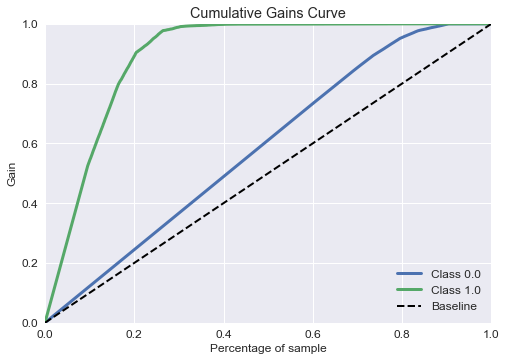

In [48]:
# Plot the cumulative gains graph

predictions = dt_classifier.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predictions)

plt.show()

From the output produced above:
    
- The cumulative gains curve for our target class of 1.0 (Defaulted loans) captures/predicts 100% of the defaulted loans if we have anything greater than 30% of the total data.
- If we have 20% of the total data, the Decison Tree Classifier would capture/predict 90% of the defaulted loans.

**Lift curve**

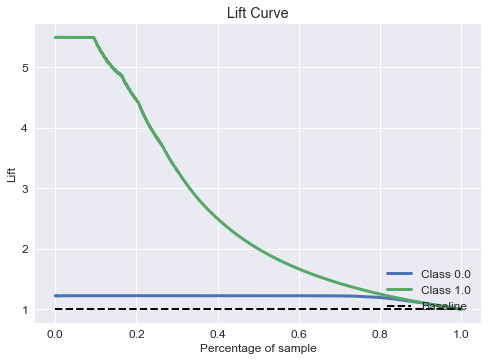

In [49]:
# Plot the lift curve

predictions = dt_classifier.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, predictions)

plt.show()

From the output produced above: 
    
- 10% of the population that are likely to default have a value of lift that is greater than 5.
- This means that 10% of the population that are likely to default will give very accurate results when it comes to predicting defaults using the Decision Tree model compared to not using any predictive model.

## Random Forests

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the Random Forests algorithm.

### Building the base classifier

In [50]:
#Initiliazing an Random Forest Classifier with default parameters

rf_classifier = RandomForestClassifier(random_state = 42)

In [51]:
#Fitting the classifier on the training data

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
#Extracting the scores

rf_classifier.score(X_test, y_test)

0.9806318752932589

From the output produced above:
    
- The base classifier with default paramters has an accuracy score of 98.0%

### Fine tuning parameters

In [53]:
#Creating a grid of hyperparameters

grid = {
    'n_estimators': [200, 300,400],
    'max_depth': [2,4,6],
    'min_samples_leaf': [0.05, 0.1]
}

#Building a 5 fold CV GridSearchCV object

grid_object = GridSearchCV(estimator = rf_classifier, param_grid = grid, scoring = 'accuracy', 
                           cv = 3, n_jobs = -1)

In [54]:
#Fitting the grid to the training data

grid_object.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 300, 400], 'max_depth': [2, 4, 6], 'min_samples_leaf': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
#Extracting the best parameters

grid_object.best_params_

{'max_depth': 6, 'min_samples_leaf': 0.05, 'n_estimators': 200}

In [56]:
#Extracting the best score

grid_object.best_score_

0.92615391490383814

In [57]:
#Extracting the best model

rf_classifier = grid_object.best_estimator_

From the output produced above:

- The accuracy of the model has decreased from 98% to 92.6% when the most optimal hyperparamters are used. 
- This suggests that the model was initially overfitting the data.

### Performance Evaluation

**Confusion Matrix**

In [58]:
#Creating predictions on the test set 

prediction = rf_classifier.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[62595   162]
 [ 5504  8463]]


In [59]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96     62757
        1.0       0.98      0.61      0.75     13967

avg / total       0.93      0.93      0.92     76724



From the output produced above: 
    
- The classifier has equally high precision and recall scores of 0.93 along with the an F1-Score of 0.92.
- This indicates that not many non-defaulted loans are predicted as defaulted (Due to the high value of precision).
- The model produces a higher number of false negatives than false positives, indicating that this model will a higher chance of predicting a loan as not defaulted when it actually has defaulted. 
- The value of recall for the prediction of defaulted loans (1.0) is very low for the random forest model at 0.61. 
- This means that many of the defaulted loans were predicted incorrectly resulting in a larger number of False Positives.
- The model has a high number of True positives and True negatives.

**Cumulative gains curve**

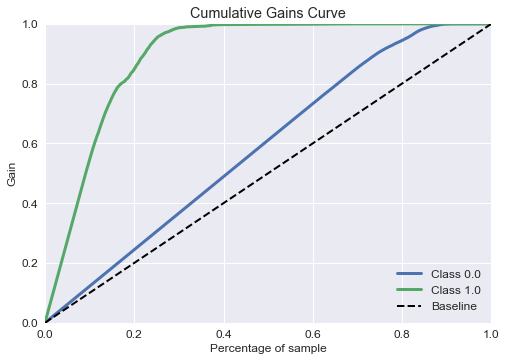

In [60]:
# Plot the cumulative gains graph

predictions = rf_classifier.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predictions)

plt.show()

From the output produced above:
    
- The cumulative gains curve for our target class of 1.0 (Defaulted loans) captures/predicts 100% of the defaulted loans if we have anything greater than 30% of the total data.
- If we have 20% of the total data, the random forest classifier would capture/predict 85% of the defaulted loans.

**Lift curve**

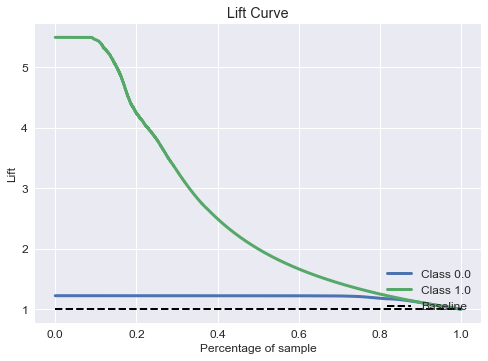

In [61]:
# Plot the lift curve

predictions = rf_classifier.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, predictions)

plt.show()

From the output produced above: 
    
- 10% of the population that are likely to default have a value of lift that is greater than 5.
- This means that 10% of the population that are likely to default will give very accurate results when it comes to predicting defaults using the Random Forest Model compared to not using any predictive model.

## Gradient Boosted Trees (AdaBoost)

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the Gradient Boosted Trees (AdaBoost) algorithm.

In [62]:
#Initialize a weak learner (Decision Tree with max depth = 1)

weak_learner = DecisionTreeClassifier(max_depth=1, random_state = 42)

In [63]:
#Initialize an AdaBoost classifier with the weak learner as the base estimator

ada_classifier = AdaBoostClassifier(base_estimator = weak_learner, n_estimators=100)

In [64]:
#Fitting the AdaBoost classifier to the training set

ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [65]:
#Extracting the accuracy scores from the classifier

ada_classifier.score(X_test, y_test)

0.96901882070799228

From the output produced above:
    
- The base classifier produces an accuracy score of 96.9%

### Fine tuning parameters

In [66]:
#Creating a grid of hyperparameters

grid = {
    'n_estimators': [100,200,300]
}

#Building a 5 fold CV GridSearchCV object

grid_object = GridSearchCV(estimator = ada_classifier, param_grid = grid, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [67]:
#Fitting the grid to the training data

grid_object.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
#Extracting the best parameters

grid_object.best_params_

{'n_estimators': 300}

In [69]:
#Extracting the best score

grid_object.best_score_

0.97022695661402847

In [70]:
#Extracting the best model

ada_classifier = grid_object.best_estimator_

From the output produced above:

- The accuracy of the model has improved from 96.9% to 97% when the most optimal hyperparamters are used. 

### Performance Evaluation

**Confusion Matrix**

In [71]:
#Creating predictions on the test set 

prediction = ada_classifier.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[61702  1055]
 [ 1267 12700]]


In [72]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98     62757
        1.0       0.92      0.91      0.92     13967

avg / total       0.97      0.97      0.97     76724



From the output produced above:
    
- The number of false positives and false negatives are almost the same suggesting that the model is very balanced.
- The number of true positives and true negatives are high suggesting that the model predicts correctly in most cases.
- The precison, recall and F1-score are the same and high in all cases at 0.97.
- This indicates that not many non-defaulted loans are predicted as defaulted (Due to the high value of precision).
- This also indicates that the model predicted most of the defaulted loans correctly (Due to the high value of recall).

**Cumulative Gains Curve**

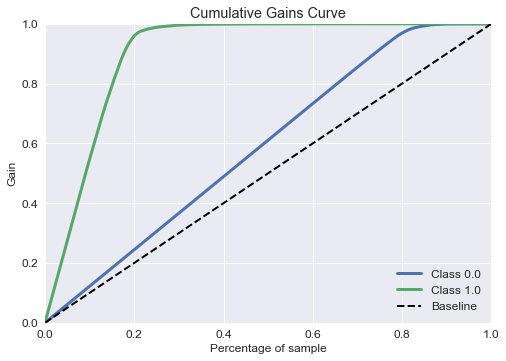

In [73]:
# Plot the cumulative gains graph

predictions = ada_classifier.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predictions)

plt.show()

From the output produced above:
    
- The cumulative gains curve for our target class of 1.0 (Defaulted loans) captures/predicts 100% of the defaulted loans if we have anything greater than 33% of the total data.
- If we have 20% of the total data, the gradient boosted tree classifier would capture/predict 95% of the defaulted loans.

**Lift Curve**

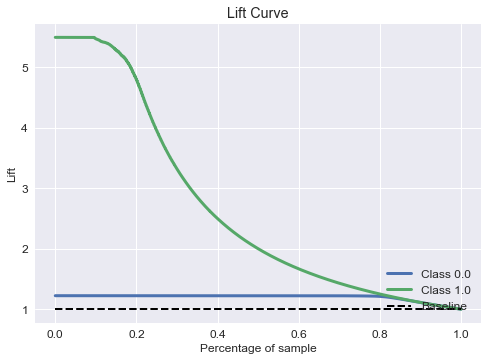

In [74]:
# Plot the lift curve

predictions = ada_classifier.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, predictions)

plt.show()

From the output produced above: 
    
- 18% of the population that are likely to default have a value of lift that is greater than 5.
- This means that 18% of the population that are likely to default will give very accurate results when it comes to predicting defaults using the AdaBoost model compared to not using any predictive model.

## Gaussian Naive Bayes

**Aim**: The aim of this section to build and evaluate a model to predict defaults using the Gaussian Naive Bayes algorithm.

### Building the base classifier

In [75]:
#Initializing an NB classifier

naive_bayes_classifier = GaussianNB()

In [76]:
#Fitting the classifier into the training data

naive_bayes_classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [77]:
#Extracting the accuracy score from the base classifier

naive_bayes_classifier.score(X_test, y_test)

0.91137062718314998

From the output produced above:
    
- The base Naive Bayes classifier has an accuracy score of 91.1%

### Scaling the data

In [78]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('NB', GaussianNB())]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

naive_bayes_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

naive_bayes_scaled.score(X_test, y_test)

0.91326051822115639

From the output produced above: 
    
- The accuracy of the model has improved from 91.1% to 91.3% after scaling the data.

### Performance Evaluation

**Confusion Matrix**

In [79]:
#Creating predictions on the test set 

prediction = naive_bayes_scaled.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[62757     0]
 [ 6655  7312]]


In [80]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95     62757
        1.0       1.00      0.52      0.69     13967

avg / total       0.92      0.91      0.90     76724



From the output above:
    
- The classifer produces 0 false positives - Thus making this model very optimal if the lender/investor requires to minimize the number of false negatives.
- This classifier produces a large number of false negatives. 
- The classifier produces a very large number of True positives and true negatives. 
- The classifier has very low recall and F-1 scores for the target - (1.0) which is the defaulted loans.
- The classifier has very high precision scores.

**Cumulative Gains Curve**

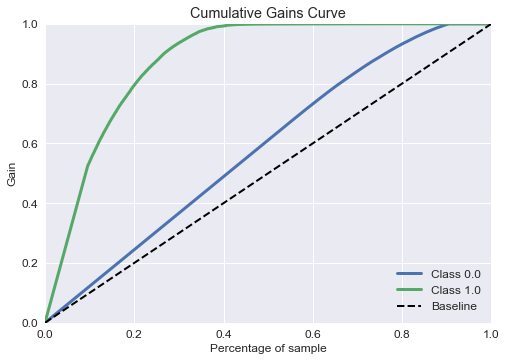

In [81]:
# Plot the cumulative gains graph

predictions = naive_bayes_scaled.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predictions)

plt.show()

From the output produced above:
    
- The cumulative gains curve for our target class of 1.0 (Defaulted loans) captures/predicts 100% of the defaulted loans if we have anything greater than 40% of the total data.
- If we have 20% of the total data, the k-NN classifier would capture/predict 80% of the defaulted loans.

**Lift curve**

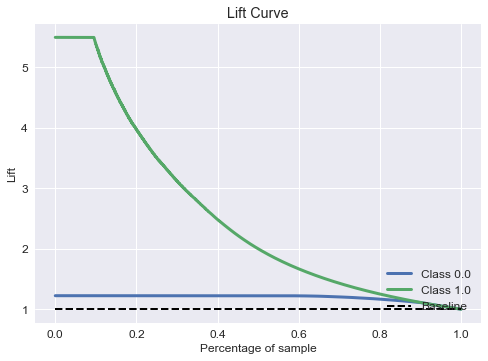

In [82]:
# Plot the lift curve

predictions = naive_bayes_scaled.predict_proba(X_test)

skplt.metrics.plot_lift_curve(y_test, predictions)

plt.show()

From the output produced above: 
    
- 10% of the population that are likely to default have a value of lift that is greater than 5.
- This means that 10% of the population that are likely to default will give very accurate results when it comes to predicting defaults using the Naive Bayes model compared to not using any predictive model.

## Ensemble Model

**Aim**: The aim of this section to build and evaluate a model to predict defaults using an Ensemble of all the models built thus far.

### Building the base classifier

In [83]:
#Creating a list of all the classifiers to be used in the ensemble model

model_list = [('k-NN', knn_classifier_scaled), ('Logistic Regression', logistic_regression_scaled),
             ('Linear SVM', svm_classifier_scaled), ('dt', dt_classifier), ('rf', rf_classifier),
             ('adaboost', ada_classifier), ('NB', naive_bayes_scaled)]

In [84]:
#Initialize a voting classifier

voting_classifier = VotingClassifier(estimators= model_list)

In [85]:
#Fit the model to the training data

voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('k-NN', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]))...ler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('NB', GaussianNB(priors=None))]))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [86]:
#Extracting the score from the classifier 

voting_classifier.score(X_test, y_test)

0.96211094312079659

From the output produced above:
    
- The base ensemble model produces an accuracy score of 96.2%

### Scaling the data

In [87]:
#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('vc', VotingClassifier(estimators= model_list))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

voting_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

voting_scaled.score(X_test, y_test)

0.96211094312079659

- After scaling the data the accuracy of the model remains the same.

### Performance Evaluation

**Confusion Matrix**

In [88]:
#Creating predictions on the test set 

prediction = voting_scaled.predict(X_test)

#Creating the confusion matrix 

print(confusion_matrix(y_test, prediction))

[[62031   726]
 [ 2181 11786]]


In [89]:
#Creating the classification report 

print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98     62757
        1.0       0.94      0.84      0.89     13967

avg / total       0.96      0.96      0.96     76724



*Due to the lack of a predict_proba function the Area under the curve score, cumulative gains curve and lift curve could not be computed, thus model interpretability is limited to the accuracy scores & confusion matrix*

From the output produced above:

- The model has a large number of False negatives compared to the False positives. 
- This means that a large number of the predicted default loans were actually not defaulted. 
- The model alos has a large number of True positives and True negatives suggesting that the model is mostly accurate. 
- The model has high values of precision and recall. 

## Evaluation and Results

**Aim:** The aim of the section below is to evaluate & compare the results of all the classification models built.

**Evaluation of the accuracy scores of the classification models**

In [90]:
#Creating a list of all the classifiers to be used in the ensemble model

model_list = [('k-NN', knn_classifier_scaled), ('Logistic Regression', logistic_regression_scaled),
             ('Linear SVM', svm_classifier_scaled), ('Decision Tree', dt_classifier), ('Random Forest', rf_classifier),
             ('Gradient Boosted Tree', ada_classifier), ('Naive Bayes', naive_bayes_scaled), 
             ('Ensemble', voting_scaled)]

In [91]:
for model_name, model in model_list:    
  
    # Fit model 
    model.fit(X_train, y_train)    
  
    # Predict on test
    y_pred = model.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate model's accuracy on test
    print('{:s} : {:.3f}'.format(model_name, accuracy))

k-NN : 0.952
Logistic Regression : 0.951
Linear SVM : 0.957
Decision Tree : 0.944
Random Forest : 0.926
Gradient Boosted Tree : 0.970
Naive Bayes : 0.913
Ensemble : 0.962


In [142]:
y = ['k-NN', 'Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest','Gradient Boosted Tree', 
     'Naive Bayes', 'Ensemble']
x = [95.2, 95.1, 95.7, 94.4, 92.6, 97.0, 91.3, 96.2]

In [143]:
#Creating series 

y = pd.Series(y)
x = pd.Series(x)

In [144]:
#Making the series into a dataframe

acc_df = pd.DataFrame(
{
    'accuracy_score': x,
    'classifier': y
    
})

In [145]:
#Sorting according to the accuracy score

acc_df = acc_df.sort_values('accuracy_score', ascending= False)

In [146]:
#Printing out the dataframe

acc_df

,accuracy_score,classifier
5,97.0,Gradient Boosted Tree
7,96.2,Ensemble
2,95.7,Linear SVM
0,95.2,k-NN
1,95.1,Logistic Regression
3,94.4,Decision Tree
4,92.6,Random Forest
6,91.3,Naive Bayes


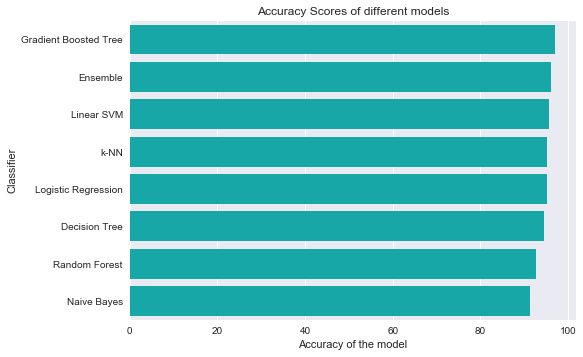

In [147]:
#Creating a bar plot of the accuracy scores

sns.barplot(x = 'accuracy_score', y = 'classifier', data = acc_df, color = 'c')
plt.xlabel('Accuracy of the model')
plt.ylabel('Classifier')
plt.title('Accuracy Scores of different models')
warnings.filterwarnings('ignore')
plt.show()

From the output produced above:
    
- The **Gradient boosted tree** model has the **highest accuracy with 97%**.
- The **Naive Bayes** model has the **lowest accuracy with 91.3%.**

In [98]:
#Creating a list of all the classifiers

model_list = [('k-NN', knn_classifier_scaled), ('LR', logistic_regression_scaled),
             ('SVM', svm_classifier_scaled), ('DT', dt_classifier), ('RF', rf_classifier),
             ('Ada', ada_classifier), ('NB', naive_bayes_scaled), 
             ('Ensemble', voting_scaled)]

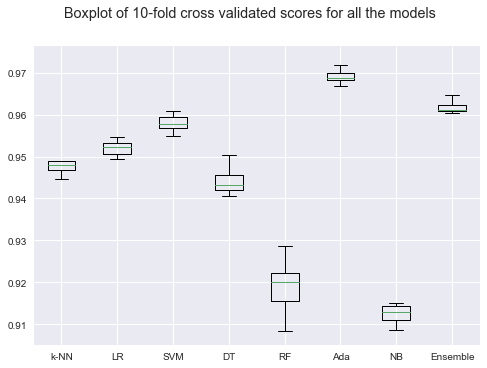

In [99]:
#Plotting box plots of the cross validated accuracy scores of each model

#Initializing empty lists in order to store the results of cross validation and the model names
cv_result = []
model_names = []

for model_name, model in model_list:
    #10-fold cross validation
    cv_10 = model_selection.KFold(n_splits=10, random_state= 42)
    #Extracting the cross validation accuracy scores
    cv_scores = model_selection.cross_val_score(model, X_test, y_test, cv = cv_10, scoring= 'accuracy')
    cv_result.append(cv_scores)
    model_names.append(model_name)
    
# Creating the box plot
fig = plt.figure()
fig.suptitle('Boxplot of 10-fold cross validated scores for all the models')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels(model_names)
plt.show()

**False positive rates**

In [100]:
#Function that prints out the false positive rates

def false_positive_rate(model):
    
    pred = model.predict(X_test)
    cn = confusion_matrix(y_test, pred)
    TN = cn[0][0]
    FN = cn[1][0]
    TP = cn[1][1]
    FP = cn[0][1]
    FPR = (FP/(FP + TN))
    
    return FPR

In [101]:
for model_name, model in model_list:
    print(model_name, false_positive_rate(model))

k-NN 0.0293991108562
LR 0.0235511576398
SVM 0.0224994821295
DT 0.0234555507752
RF 0.00258138534347
Ada 0.0168108736874
NB 0.0
Ensemble 0.0115684306133


In [136]:
y = ['k-NN', 'Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest','Gradient Boosted Tree', 
     'Naive Bayes', 'Ensemble']
x = [2.9, 2.3, 2.2, 2.3, 0.25, 1.6, 0, 1.1]

In [137]:
#Creating series 

y = pd.Series(y)
x = pd.Series(x)

In [138]:
#Making the series into a dataframe

fpr_df = pd.DataFrame(
{
    'false_positive_rate': x,
    'classifier': y
    
})

In [139]:
#Sorting according to the fpr value

fpr_df = fpr_df.sort_values('false_positive_rate', ascending= False)

In [140]:
#Printing out the dataframe

fpr_df

,classifier,false_positive_rate
0,k-NN,2.90
1,Logistic Regression,2.30
3,Decision Tree,2.30
2,Linear SVM,2.20
5,Gradient Boosted Tree,1.60
7,Ensemble,1.10
4,Random Forest,0.25
6,Naive Bayes,0.00


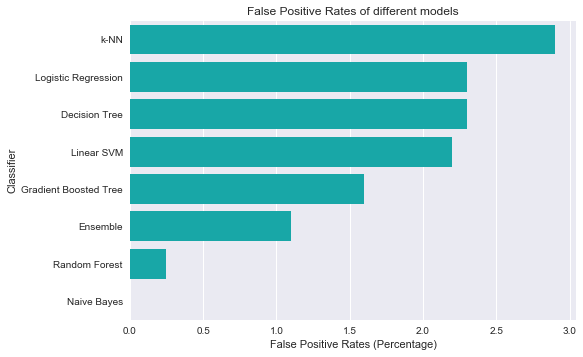

In [141]:
#Creating a bar plot of the fpr

sns.barplot(x = 'false_positive_rate', y = 'classifier', data = fpr_df, color = 'c')
plt.xlabel('False Positive Rates (Percentage)')
plt.ylabel('Classifier')
plt.title('False Positive Rates of different models')
warnings.filterwarnings('ignore')
plt.show()

**False Negative Rates**

In [108]:
#Function that prints out the false negative rates

def false_negative_rate(model):
    
    pred = model.predict(X_test)
    cn = confusion_matrix(y_test, pred)
    TN = cn[0][0]
    FN = cn[1][0]
    TP = cn[1][1]
    FP = cn[0][1]
    FNR = (FN/(FN + TP))
    
    return FNR

In [109]:
for model_name, model in model_list:
    print(model_name, false_negative_rate(model))

k-NN 0.129018400516
LR 0.161308799313
SVM 0.134173408749
DT 0.202405670509
RF 0.394071740531
Ada 0.0907138254457
NB 0.476480274934
Ensemble 0.156153791079


In [130]:
y = ['k-NN', 'Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest','Gradient Boosted Tree', 
     'Naive Bayes', 'Ensemble']
x = [12.9, 16.1, 13.4, 20.2, 39.4, 9.0, 47.6, 15.6]

In [131]:
#Creating series 

y = pd.Series(y)
x = pd.Series(x)

In [132]:
#Making the series into a dataframe

fnr_df = pd.DataFrame(
{
    'false_negative_rate': x,
    'classifier': y
    
})

In [133]:
#Sorting according to the fnr value

fnr_df = fnr_df.sort_values('false_negative_rate', ascending= False)

In [134]:
#Printing out the dataframe

fnr_df

,classifier,false_negative_rate
6,Naive Bayes,47.6
4,Random Forest,39.4
3,Decision Tree,20.2
1,Logistic Regression,16.1
7,Ensemble,15.6
2,Linear SVM,13.4
0,k-NN,12.9
5,Gradient Boosted Tree,9.0


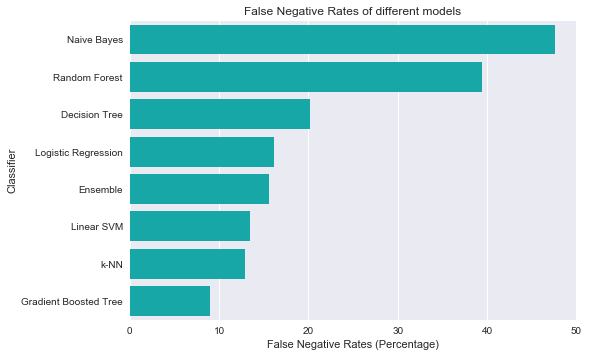

In [135]:
#Creating a bar plot of the fnr

sns.barplot(x = 'false_negative_rate', y = 'classifier', data = fnr_df, color = 'c')
plt.xlabel('False Negative Rates (Percentage)')
plt.ylabel('Classifier')
plt.title('False Negative Rates of different models')
warnings.filterwarnings('ignore')
plt.show()

**F1 Score**

In [116]:
# Function that outputs the F-1 Scores

def f1_score(model):
    
    pred = model.predict(X_test)
    cn = confusion_matrix(y_test, pred)
    TN = cn[0][0]
    FN = cn[1][0]
    TP = cn[1][1]
    FP = cn[0][1]
    prec = (TP/(TP + FP))
    recall = (TP/(TP + FN))
    F1 = ((2 * prec * recall)/(prec + recall))
    
    return F1

In [117]:
for model_name, model in model_list:
    print(model_name, f1_score(model))

k-NN 0.869642920971
LR 0.862623807946
SVM 0.880387303436
DT 0.83825576583
RF 0.74920325779
Ada 0.916239809538
NB 0.687250340711
Ensemble 0.890214887269


In [124]:
y = ['k-NN', 'Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest','Gradient Boosted Tree', 
     'Naive Bayes', 'Ensemble']
x = [86.9, 86.2, 87.2, 83.8, 74.9, 91.6, 68.7, 89.0]

In [125]:
#Creating series 

y = pd.Series(y)
x = pd.Series(x)

In [126]:
#Making the series into a dataframe

f1_df = pd.DataFrame(
{
    'F1_score': x,
    'classifier': y
    
})

In [127]:
#Sorting according to the fnr value

f1_df = f1_df.sort_values('F1_score', ascending= False)

In [128]:
#Printing out the dataframe

f1_df

,F1_score,classifier
5,91.6,Gradient Boosted Tree
7,89.0,Ensemble
2,87.2,Linear SVM
0,86.9,k-NN
1,86.2,Logistic Regression
3,83.8,Decision Tree
4,74.9,Random Forest
6,68.7,Naive Bayes


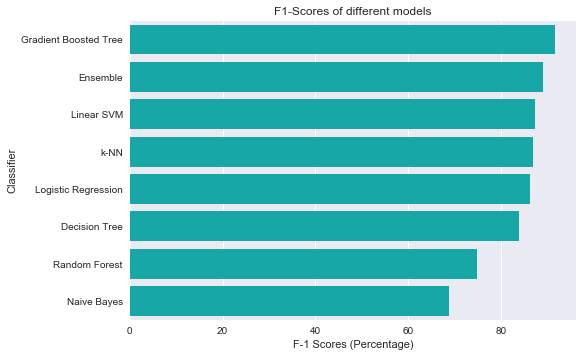

In [129]:
#Creating a bar plot of the f-1 socres

sns.barplot(x = 'F1_score', y = 'classifier', data = f1_df, color = 'c')
plt.xlabel('F-1 Scores (Percentage)')
plt.ylabel('Classifier')
plt.title('F1-Scores of different models')
warnings.filterwarnings('ignore')
plt.show()